# Data Science Project Proposal: 
## A deep dive into football

Abhishek Purwaha 46435255 
Cameron Warton 44635931
Jack Reynolds 44635206
Zahin Sobhan Enan 46247165


The search for the best quantitative statistic for measuring a players contribution to a game
Questions:
1) Whats the most important traditional statistics and why they arent a good reflection of a players contribution (biased
2) Existing approaches

In [3]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

%matplotlib inline




In [4]:

import requests

url = "https://football-prediction-api.p.rapidapi.com/api/v2/performance-stats"

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "1dc48cc476msh7fa82efb8353bf0p18128fjsn2f4f1c800923"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

{"message":"Endpoint\/api\/v2\/performance-stats does not exist"}


In [8]:
import requests

headers = {
    'accept': 'application/json',
    'X-AUTH-TOKEN': '081859a6-a132-48ca-8324-ae72614e97e9',
}
#the api request will only allow 20 rows max, so im combining the top 100 for a better sample size
response1 = requests.get('https://futdb.app/api/players', headers=headers)
response2 = requests.get('https://futdb.app/api/players?page=2', headers=headers)
response3 = requests.get('https://futdb.app/api/players?page=3', headers=headers)
response4 = requests.get('https://futdb.app/api/players?page=4', headers=headers)
response5 = requests.get('https://futdb.app/api/players?page=5', headers=headers)

In [9]:
data1 = response1.json()
data2 = response2.json()
data3 = response3.json()
data4 = response4.json()
data5 = response5.json()
#data2 = {}

#df.join(other, lsuffix='_caller', rsuffix='_other')

In [12]:
print(data1['items'][0]['name'])

# This one works to extract a single data field

Pelé


In [13]:
x=0
while x < 20:
    print(data1['items'][x]['name'])
    
    x+=1;
#Inspecting data    
#Lists all the names of the top 20 theoretically highest rated historical soccer players
# Pele and Maradona occur twice, need to clean the data to drop their duplicate values 
#(its the different variants 98,97 OVR and 95,95)

Pelé
Diego Maradona
Ronaldo
Zinedine Zidane
Diego Maradona
Pelé
Ronaldinho
Ronaldo
Zinedine Zidane
Ferenc Puskás
Johan Cruyff
Lev Yashin
Mané Garrincha
Paolo Maldini
Marcos Cafú
Franco Baresi
George Best
Lothar Matthäus
Marco van Basten
Roberto Baggio


Total Pace:  1691 Average Pace:  89.0
Total Shooting:  1629 Average Shooting:  85.7
Total Passing:  1660 Average Passing:  87.4
Total Dribbling:  1721 Average Dribbling:  90.6
Total Defending:  1111 Average Defending:  58.5
Total Physicality:  1468 Average Physicality:  77.3


<BarContainer object of 6 artists>

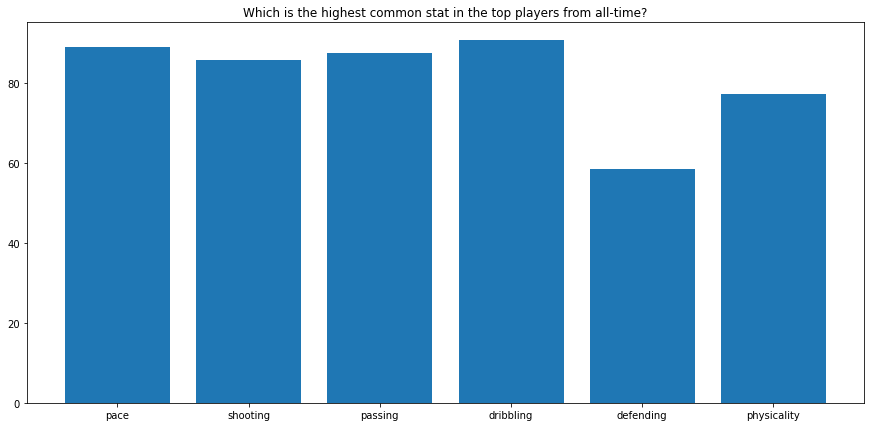

In [14]:
skillz = {'pace': 0, 'shooting': 0, 'passing': 0, 'dribbling': 0, 'defending': 0, 'physicality': 0}

x=0
while x < 20:
   # print(data['items'][x]['pace'])
    skillz['pace'] += data1['items'][x]['pace']
    skillz['shooting'] += data1['items'][x]['shooting']
    skillz['passing'] += data1['items'][x]['passing']
    skillz['dribbling'] += data1['items'][x]['dribbling']
    skillz['defending'] += data1['items'][x]['defending']
    skillz['physicality'] += data1['items'][x]['physicality']
    x+=1;

print("Total Pace: ",skillz['pace'], "Average Pace: ", "{:.1f}".format(skillz['pace']/19))
print("Total Shooting: ",skillz['shooting'], "Average Shooting: ", "{:.1f}".format(skillz['shooting']/19))
print("Total Passing: ",skillz['passing'], "Average Passing: ", "{:.1f}".format(skillz['passing']/19))
print("Total Dribbling: ",skillz['dribbling'], "Average Dribbling: ", "{:.1f}".format(skillz['dribbling']/19))
print("Total Defending: ",skillz['defending'], "Average Defending: ", "{:.1f}".format(skillz['defending']/19))
print("Total Physicality: ",skillz['physicality'], "Average Physicality: ", "{:.1f}".format(skillz['physicality']/19))

skillz['pace'] = (skillz['pace'] / 19)
skillz['shooting'] = (skillz['shooting'] / 19)
skillz['passing'] = (skillz['passing'] / 19)
skillz['dribbling'] = (skillz['dribbling'] / 19)
skillz['defending'] = (skillz['defending'] / 19)
skillz['physicality'] = (skillz['physicality'] / 19)  
    
   
    
plt.figure(figsize=(15,7))
plt.title('Which is the highest common stat in the top players from all-time?')
#sns.countplot(data=data,y='skillz');

keys = skillz.keys()
values = skillz.values()
plt.bar(keys, values)

#We can see that the goalkeeper 'Lev Yashin' has stats of zero which is an error and needs to be dropped
#I tried re-fitting the stats but noticed the outfielder stats are way higher than goalkeepers and may skew the results. i may omit the goalkeeper results.

## Do some countries naturally produce particular types of players?
## a) ‘id’, ‘name’, ‘height’, ‘weight, ‘position’, ‘traits’, pace, ‘shooting’, ‘passing’, ‘dribbling’, ‘defending’, ‘physicality’,
## b) Plotting
## c) A descending bar graph for each nation that shows the most common attributes and their their rank (eg - Germans are good defenders because they have a higher than average height which allows them to defend corners and free kicks well) Could categorise nations into continents and see if continents produce particular players too

In [ ]:

What types of players do different leagues/nations produce (attackers, midfielders, defenders, goalkeepers) (hard question to do since players are not categorised into general positions - we can just do strikers)
a) Names, position, league the play in/nation they’re from
b) Plotting 
c) have a bar graph that shows how many players of each type are produced by each league/nation

Which league/teams/nations produce the highest potential players (players under 21 that have a rating of 70/75+)
Player name, player age, rating, league/team/nation they play for 
b) not sure but can use same as above for now (plot) (i feel like we can do some clustering model for this) 
c) bar graph that shows distribution of players below the age of 21 and rating above 70 (sure that we can use a different analysis technique for this but not exactly sure what)

(depending on football-api data) predict the highest goal scorers/assits makers/clean sheets/passess completed/LEAGUE STANDINGS - using historical data predict the results for 2020/2021 season
Depending on which focus area we go with this will differ
Logistic regression (or even linear regression if logistic is too complex)
Prediction model to compare to real life results and see whether our data is able able to provide a reliable predictor.


In [15]:
df1 = pd.json_normalize(data1['items'])
df2 = pd.json_normalize(data2['items'])
df3 = pd.json_normalize(data3['items'])
df4 = pd.json_normalize(data4['items'])
df5 = pd.json_normalize(data5['items'])


#df3 = pd.json_normalize(data3['items'])


In [16]:

#df1.join(df2, lsuffix='_caller', rsuffix='_other')
#df1.set_index('id').join(df2.set_index('id'))
#df1.join(df2.set_index('id'), on='id')
frames = [df1, df2, df3, df4, df5]

df1 = pd.concat(frames)

df1 = df1.drop(['resource_id', 'resource_base_id', 'fut_bin_id','fut_wiz_id','pace_attributes','shooting_attributes','passing_attributes', 'dribbling_attributes','defending_attributes','physicality_attributes','goalkeeper_attributes','goalkeeper_attributes','goalkeeper_attributes','total_stats_in_game','total_stats','rating_average'], axis=1)
df1

,id,name,age,first_name,last_name,common_name,height,weight,birth_date,league,...,foot,attack_work_rate,defense_work_rate,rating,pace,shooting,passing,dribbling,defending,physicality
0,13728,Pelé,81,None,None,Pelé,173,70,1940-10-23,2118,...,Right,High,Med,98,95,96,93,96,60,76
1,13729,Diego Maradona,61,None,None,Maradona,165,70,1960-10-30,2118,...,Left,High,Med,97,92,93,92,97,40,76
2,13730,Ronaldo,45,None,None,Ronaldo,183,78,1976-09-22,2118,...,Right,Med,Med,96,97,95,81,95,45,76
3,13731,Zinedine Zidane,49,None,None,Zidane,185,77,1972-06-23,2118,...,Right,Med,Med,96,85,92,96,95,75,86
4,13732,Diego Maradona,61,Diego,Maradona,Maradona,165,72,1960-10-30,2118,...,Left,High,Med,95,88,91,90,95,42,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,13794,Edwin van der Sar,51,None,None,van der Sar,197,83,1970-10-29,2118,...,Right,Med,Med,91,0,0,0,0,0,0
16,13795,Eusébio,79,Eusébio,da Silva Ferreira,Eusébio,175,76,1942-01-25,2118,...,Right,High,Med,91,93,93,88,90,42,74
17,13796,Robin van Persie,38,None,None,van Persie,183,0,1983-08-06,2118,...,Left,NA,NA,91,85,94,87,90,46,74
18,13797,Fernando Hierro Ruiz,53,None,None,Hierro,187,84,1968-03-23,2118,...,Right,Med,High,91,73,68,76,70,93,87


In [17]:
df1.info


<bound method DataFrame.info of        id                  name  age first_name          last_name  \
0   13728                  Pelé   81       None               None   
1   13729        Diego Maradona   61       None               None   
2   13730               Ronaldo   45       None               None   
3   13731       Zinedine Zidane   49       None               None   
4   13732        Diego Maradona   61      Diego           Maradona   
..    ...                   ...  ...        ...                ...   
15  13794     Edwin van der Sar   51       None               None   
16  13795               Eusébio   79    Eusébio  da Silva Ferreira   
17  13796      Robin van Persie   38       None               None   
18  13797  Fernando Hierro Ruiz   53       None               None   
19  13798       Fernando Torres   37       None               None   

    common_name  height  weight  birth_date  league  ...   foot  \
0          Pelé     173      70  1940-10-23    2118  ...  Ri

<AxesSubplot:xlabel='height', ylabel='rating'>

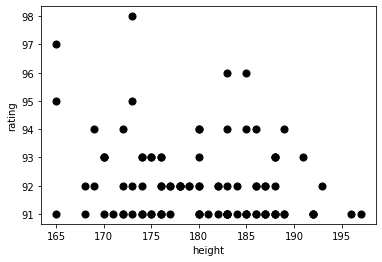

In [18]:
df1.plot(kind='scatter', x='height', y='rating', s=50, c='Black')
#They all seem to have differing heights. doesnt seem like there is a correlation

In [77]:

#iterate through df, if position = 'GK', we drop the row.
#We need to drop the goalkeeper values
        
        
for index, row in df1.iterrows():
     if row['position'] == "GK":
        df1.drop(index, inplace=True)  
        
#Now to test if theres any left over        
for row in df1.itertuples():
    if row[16] == 'GK':
        print(row[2], row[16], '\n')        


Total Pace:  8053 Average Pace:  80.53
Total Shooting:  7921 Average Shooting:  79.21
Total Passing:  7922 Average Passing:  79.22
Total Dribbling:  8188 Average Dribbling:  81.88
Total Defending:  5420 Average Defending:  54.2
Total Physicality:  7353 Average Physicality:  73.53


<BarContainer object of 6 artists>

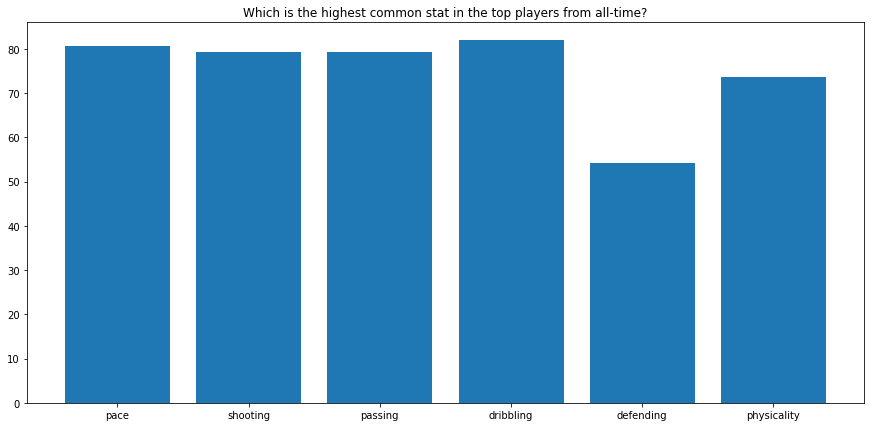

In [20]:
skillz = {'pace': 0, 'shooting': 0, 'passing': 0, 'dribbling': 0, 'defending': 0, 'physicality': 0}

skillz['pace'] = sum(df1['pace'])
skillz['shooting'] = sum(df1['shooting'])
skillz['passing'] = sum(df1['passing'])
skillz['dribbling'] = sum(df1['dribbling'])
skillz['defending'] = sum(df1['defending'])
skillz['physicality'] = sum(df1['physicality'])

print("Total Pace: ", skillz['pace'], "Average Pace: ", skillz['pace']/100)
print("Total Shooting: ",skillz['shooting'], "Average Shooting: ", skillz['shooting']/100)
print("Total Passing: ",skillz['passing'], "Average Passing: ", skillz['passing']/100)
print("Total Dribbling: ",skillz['dribbling'], "Average Dribbling: ", skillz['dribbling']/100)
print("Total Defending: ",skillz['defending'], "Average Defending: ", skillz['defending']/100)
print("Total Physicality: ",skillz['physicality'], "Average Physicality: ", skillz['physicality']/100)

skillz['pace'] = (skillz['pace'] / 100)
skillz['shooting'] = (skillz['shooting'] / 100)
skillz['passing'] = (skillz['passing'] / 100)
skillz['dribbling'] = (skillz['dribbling'] / 100)
skillz['defending'] = (skillz['defending'] / 100)
skillz['physicality'] = (skillz['physicality'] / 100)  
    

    
plt.figure(figsize=(15,7))
plt.title('Which is the highest common stat in the top players from all-time?')


keys = skillz.keys()
values = skillz.values()
plt.bar(keys, values)

#We can see that the goalkeeper 'Lev Yashin' has stats of zero which is an error and needs to be dropped
#I tried re-fitting the stats but noticed the outfielder stats are way higher than goalkeepers and may skew the results. i may omit the goalkeeper results.

not in commonPos  CAM
not in commonPos  ST
not in commonPos  CF
not in commonPos  LW
not in commonPos  RW
not in commonPos  CB
not in commonPos  RB
not in commonPos  CM
not in commonPos  RM
not in commonPos  CDM
not in commonPos  LB


<BarContainer object of 12 artists>

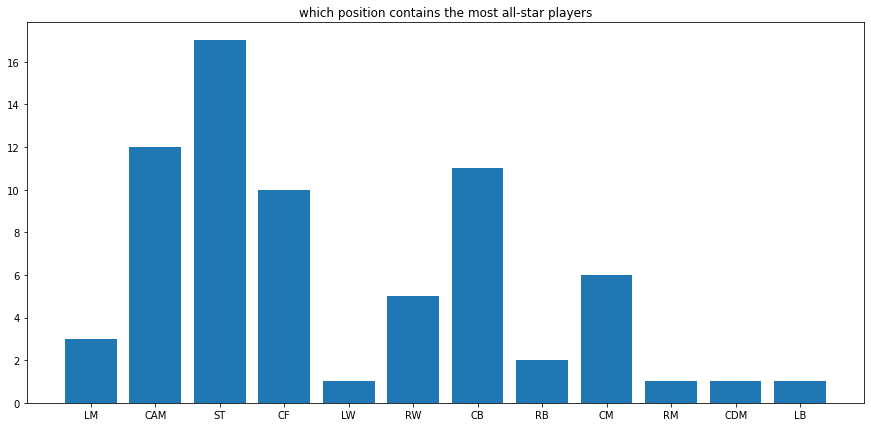

In [89]:
#creating a dictionary to see if perhaps there is a correlation between the top players and if they have the stereotype of the 'goalscorers' positions.
commonPos = {'LM' : 0}    
    
for index, row in df1.iterrows():
    if row['position'] not in commonPos:
        commonPos[row['position']] = 1
        print("not in commonPos ", row['position'])   
    elif row['position'] in commonPos:
        commonPos[row['position']] += 1
        
commonPos 
plt.figure(figsize=(15,7))
plt.title('which position contains the most all-star players')
keys = commonPos.keys()
values = commonPos.values()
plt.bar(keys, values)
